# Step1: Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cluster import k_means
from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet,Lasso,ridge_regression
from sklearn.tree import plot_tree,DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,silhouette_score,confusion_matrix,euclidean_distances,explained_variance_score,root_mean_squared_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [3]:
df=pd.read_csv('database.csv')
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


# Step2 : Data preprocessing

In [3]:
df.shape

(2795, 48)

In [4]:
df.isna().sum().sort_values(ascending=False)

All Fatalities                          2787
Operator Employee Fatalities            2787
Operator Contractor Fatalities          2787
Emergency Responder Fatalities          2787
Other Fatalities                        2787
Public Fatalities                       2787
Emergency Responder Injuries            2783
Operator Employee Injuries              2783
Other Injuries                          2783
Public Injuries                         2783
All Injuries                            2783
Operator Contractor Injuries            2783
Liquid Name                             2573
Intentional Release (Barrels)           1586
Restart Date/Time                       1454
Liquid Subtype                          1446
Shutdown Date/Time                      1405
Public Evacuations                       457
Accident City                            315
Pipeline Shutdown                        212
Pipeline/Facility Name                   121
Accident County                           75
Pipeline T

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [6]:
df.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


In [4]:

df['Pipeline Type'].fillna(df['Pipeline Type'].mode(),inplace=True)

In [5]:
df.drop(columns=['Public Fatalities','Operator Employee Fatalities','Operator Contractor Fatalities','Emergency Responder Fatalities',
               'Other Fatalities','Operator Contractor Injuries','Other Injuries','Public Injuries','All Injuries','Operator Employee Injuries',
               'Emergency Responder Injuries','Liquid Name'],axis=1,inplace=True)

In [6]:
df.drop(columns=['All Fatalities','Unintentional Release (Barrels)','Operator ID','Accident Date/Time','Supplemental Number','Report Number','Intentional Release (Barrels)','Restart Date/Time','Liquid Subtype','Shutdown Date/Time'],axis=1,inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum().sort_values(ascending=False)

Accident Year                           0
Operator Name                           0
Other Costs                             0
Environmental Remediation Costs         0
Emergency Response Costs                0
Public/Private Property Damage Costs    0
Lost Commodity Costs                    0
Property Damage Costs                   0
Public Evacuations                      0
Pipeline Shutdown                       0
Liquid Explosion                        0
Liquid Ignition                         0
Net Loss (Barrels)                      0
Liquid Recovery (Barrels)               0
Cause Subcategory                       0
Cause Category                          0
Accident Longitude                      0
Accident Latitude                       0
Accident State                          0
Accident County                         0
Accident City                           0
Liquid Type                             0
Pipeline Type                           0
Pipeline Location                 

In [10]:
df['high_cost']=(df['All Costs']>1000000).astype('int')
df['high_cost']

11      0
14      0
16      1
17      0
19      0
       ..
2787    0
2790    0
2792    0
2793    0
2794    0
Name: high_cost, Length: 1923, dtype: int32

In [11]:
# check the data types
numerics=df.select_dtypes(np.number).columns
numerics
# numbers=['Accident Latitude', 'Accident Longitude',
#        'Unintentional Release (Barrels)', 'Liquid Recovery (Barrels)',
#        'Net Loss (Barrels)', 'Public Evacuations', 'All Fatalities',
#        'Property Damage Costs', 'Lost Commodity Costs',
#        'Public/Private Property Damage Costs', 'Emergency Response Costs',
#        'Environmental Remediation Costs', 'Other Costs', 'All Costs',
#        'high_cost']

Index(['Accident Year', 'Accident Latitude', 'Accident Longitude',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Public Evacuations',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs',
       'high_cost'],
      dtype='object')

In [12]:
category=df.select_dtypes('object').columns
category

Index(['Operator Name', 'Pipeline/Facility Name', 'Pipeline Location',
       'Pipeline Type', 'Liquid Type', 'Accident City', 'Accident County',
       'Accident State', 'Cause Category', 'Cause Subcategory',
       'Liquid Ignition', 'Liquid Explosion', 'Pipeline Shutdown'],
      dtype='object')

# Step 3: EDA

<Axes: ylabel='Pipeline Shutdown'>

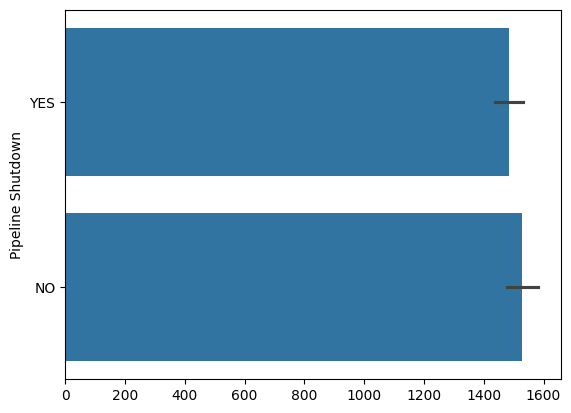

In [24]:
# Check the pipeline shutdown insights
sns.barplot(df['Pipeline Shutdown'])

In [33]:
order=df['Pipeline Type'].value_counts().index

C:\Users\Admin\AppData\Local\Temp\ipykernel_26632\3867919860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Pipeline Type'],order=order,palette='Greens')


<Axes: xlabel='count', ylabel='Pipeline Type'>

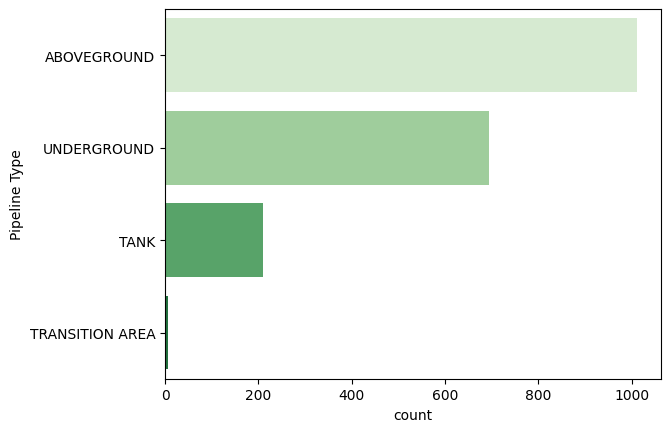

In [36]:
sns.countplot(df['Pipeline Type'],order=order,palette='Greens')

In [39]:
cause=df['Cause Category'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_26632\3521987873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cause,palette='Oranges')


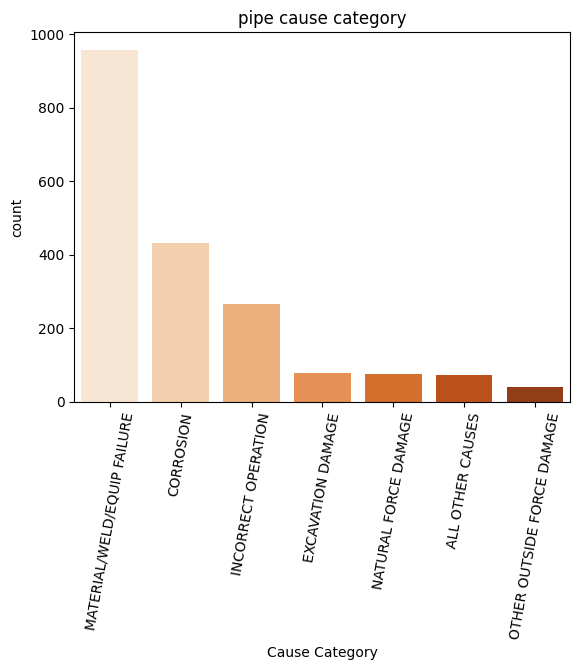

In [44]:

sns.barplot(cause,palette='Oranges')
plt.title('pipe cause category')
plt.xticks(rotation=80)
plt.show()

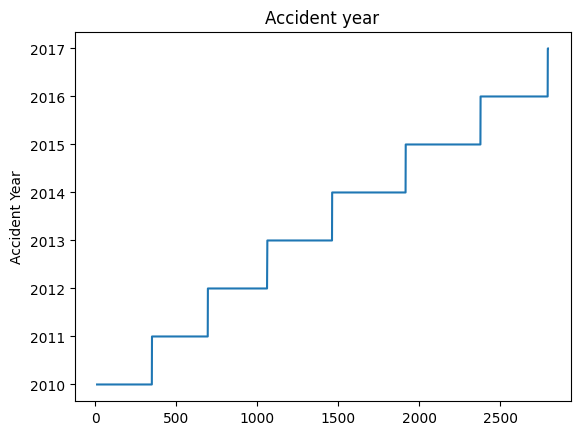

In [49]:
sns.lineplot(df['Accident Year'])
plt.title('Accident year')
plt.show()

<Axes: xlabel='Property Damage Costs', ylabel='Lost Commodity Costs'>

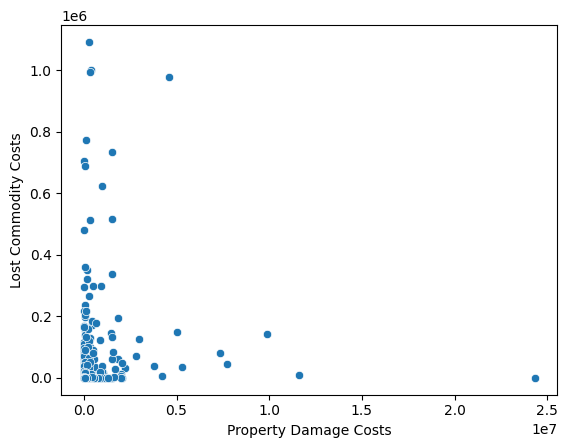

In [56]:
sns.scatterplot(x=df['Property Damage Costs'],y=df['Lost Commodity Costs'])

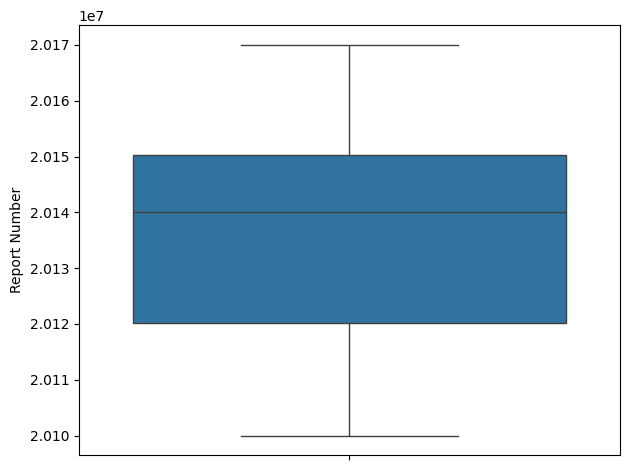

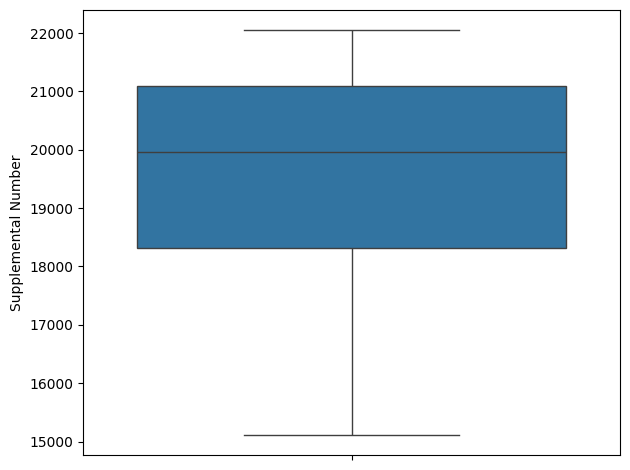

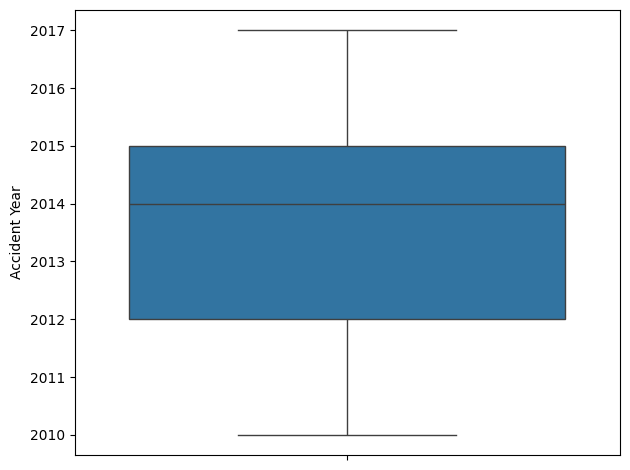

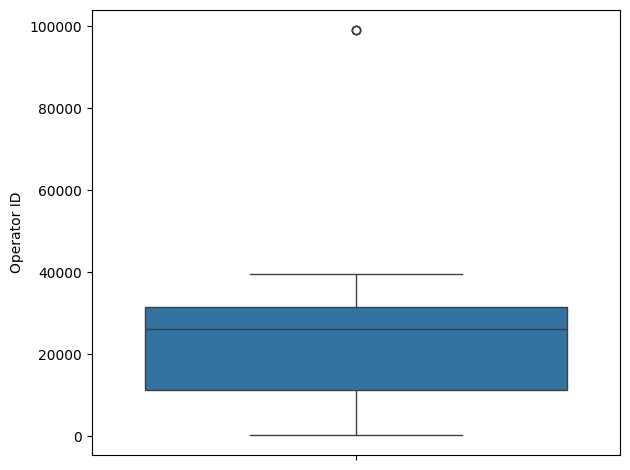

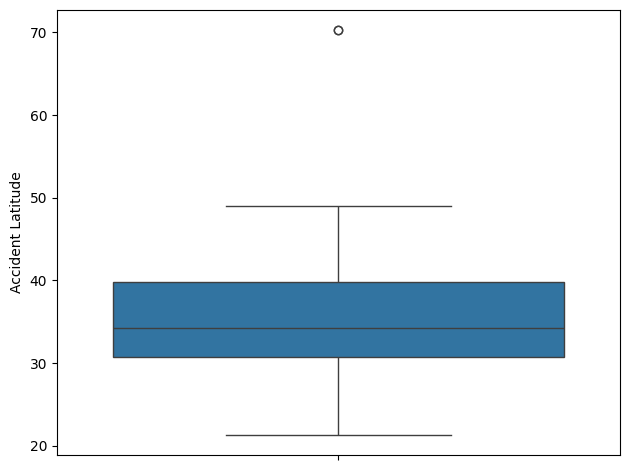

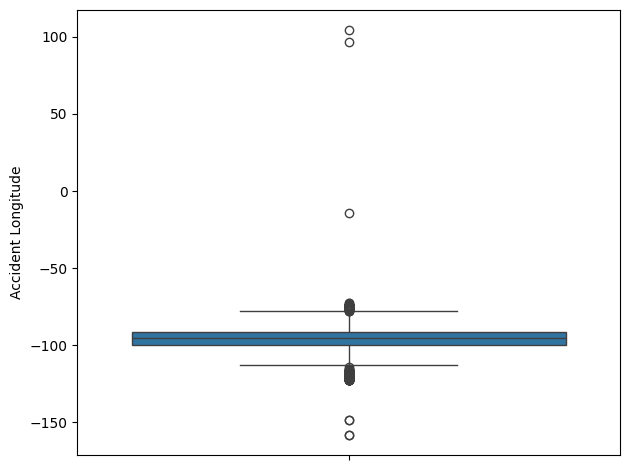

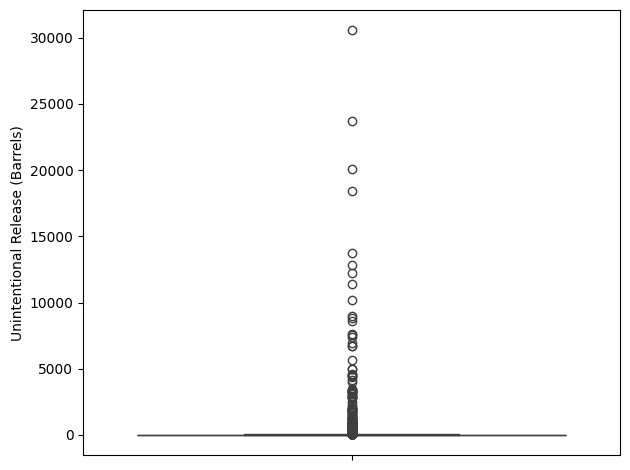

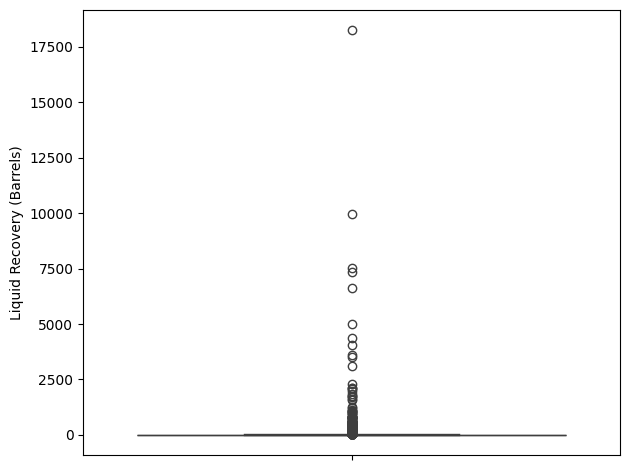

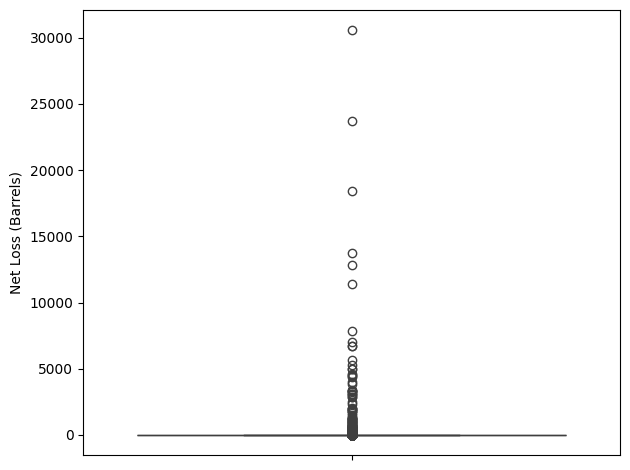

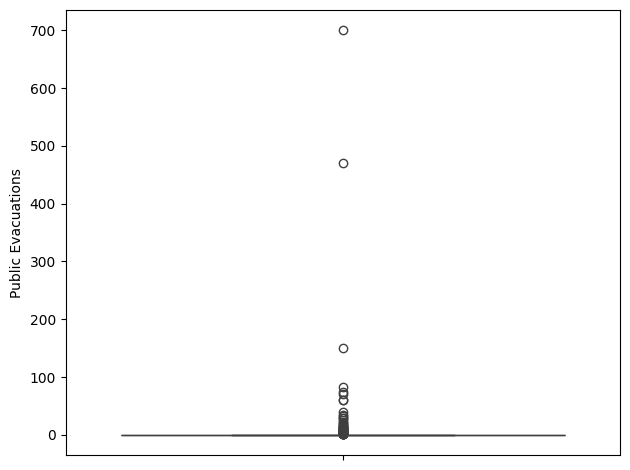

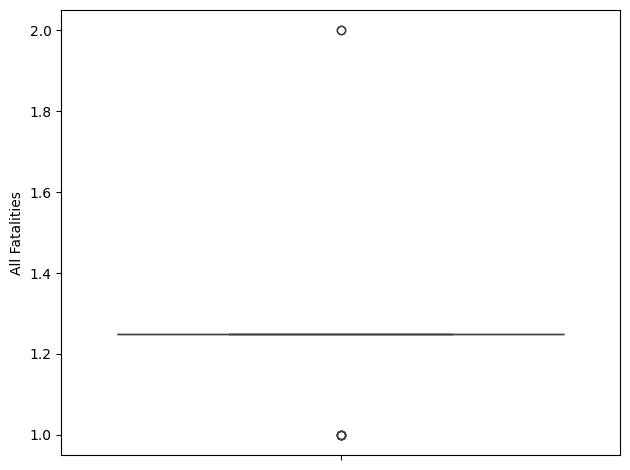

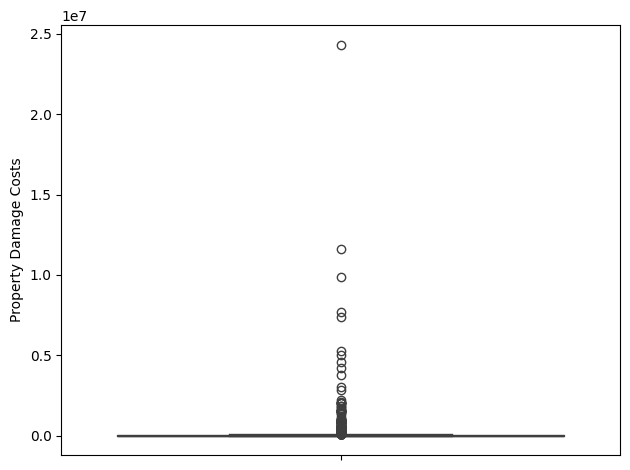

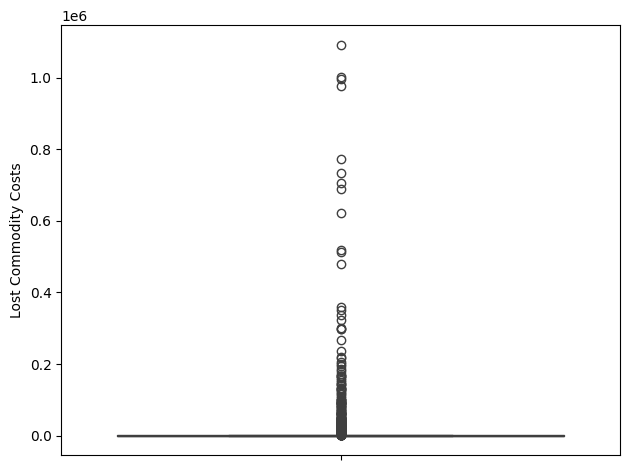

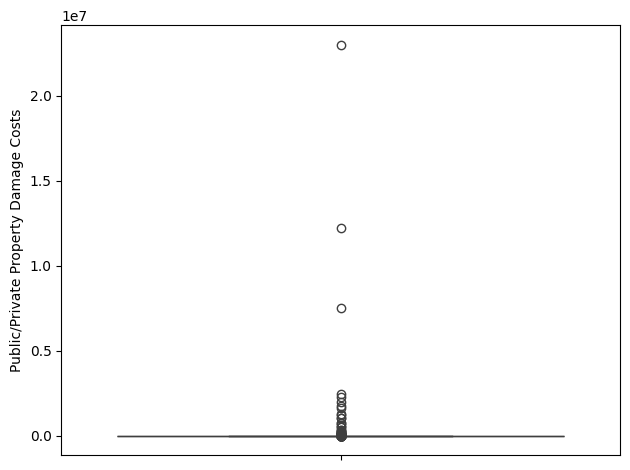

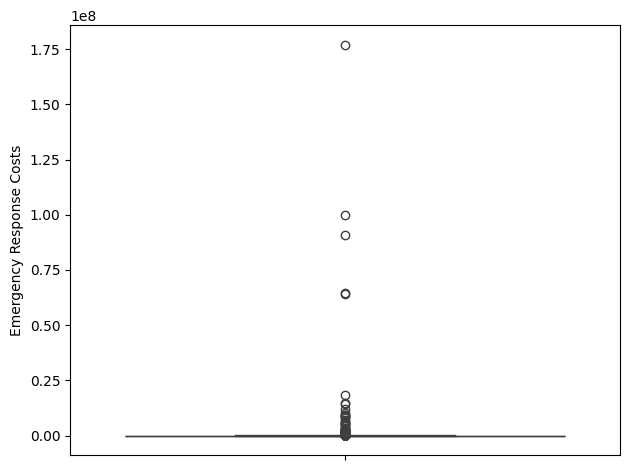

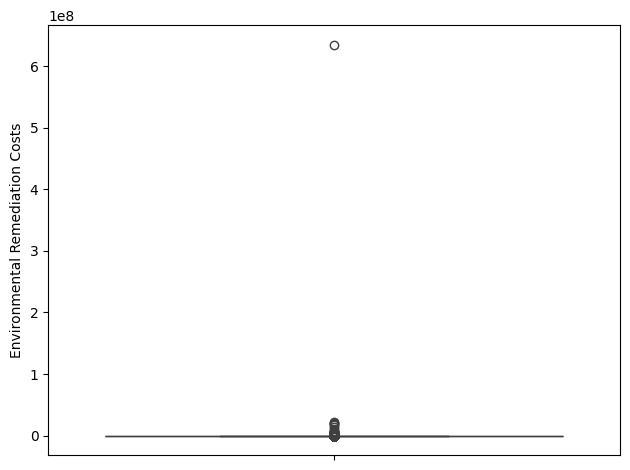

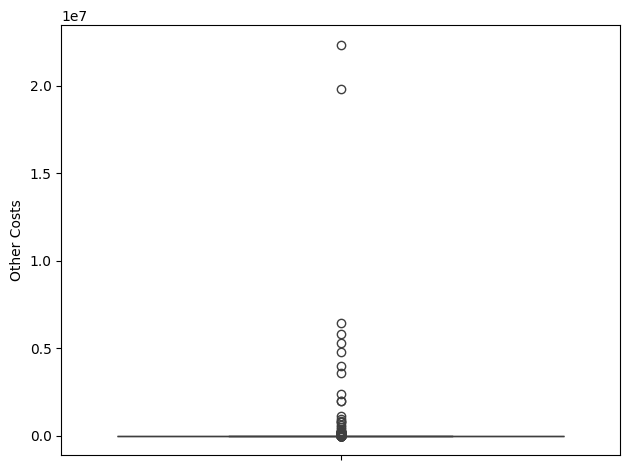

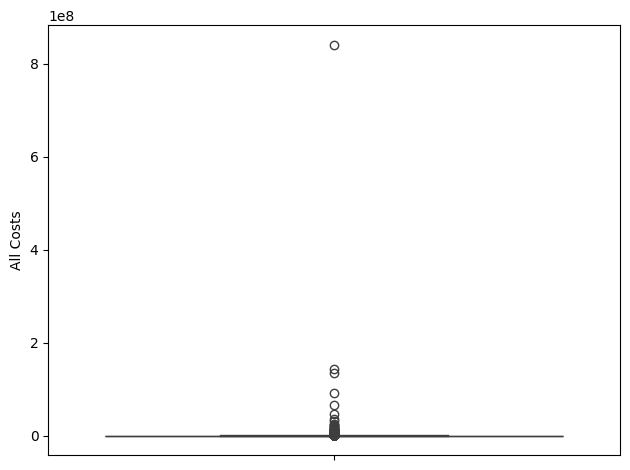

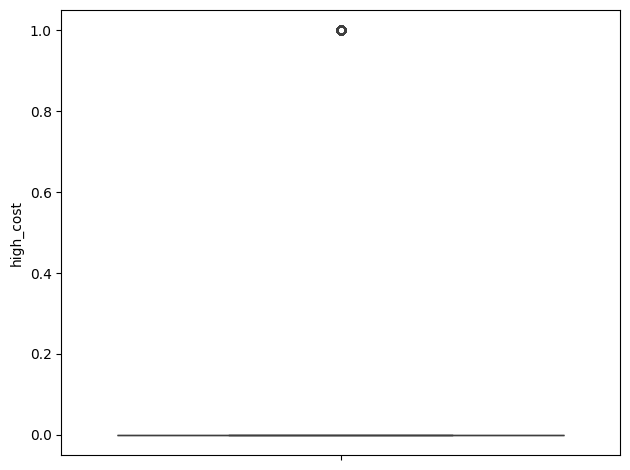

In [57]:
numeric=df.select_dtypes(np.number).columns
for i in numeric:
    sns.boxplot(df[i])
    plt.tight_layout()
    plt.show()

In [21]:
# outlier removals
for i in numerics:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    df[i]=np.where(df[i]<lw,lw,np.where(df[i]>uw,uw,df[i]))
    

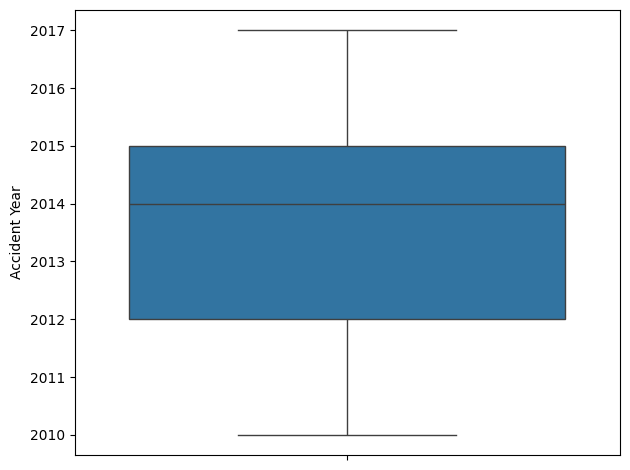

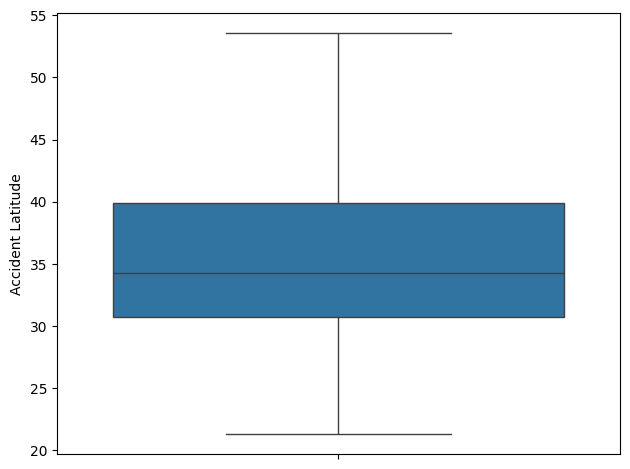

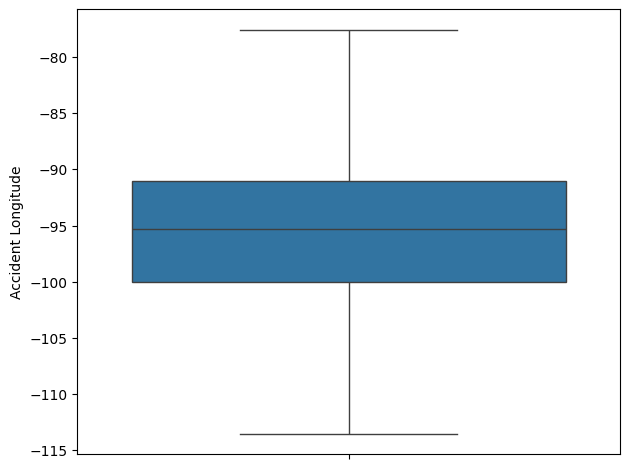

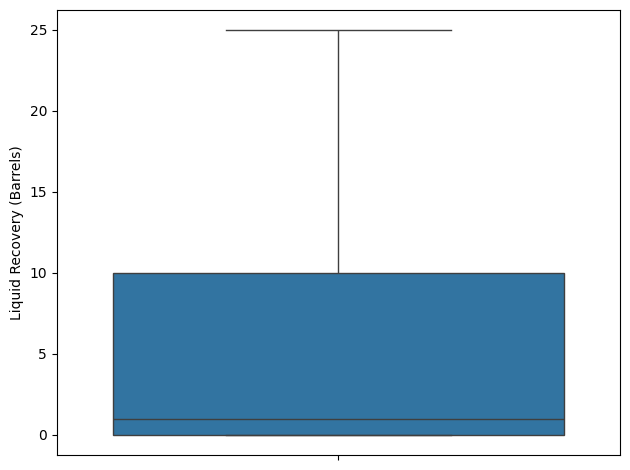

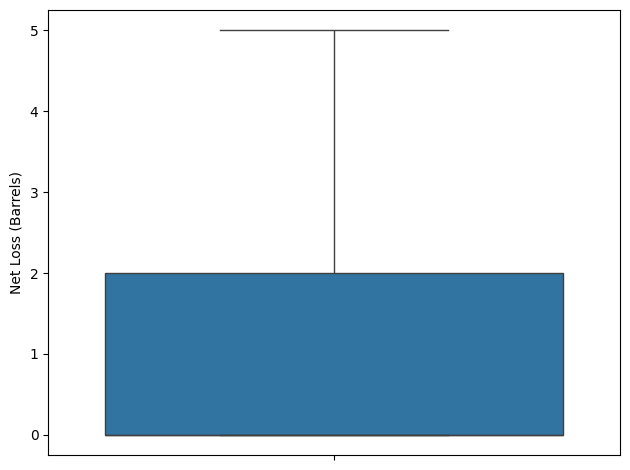

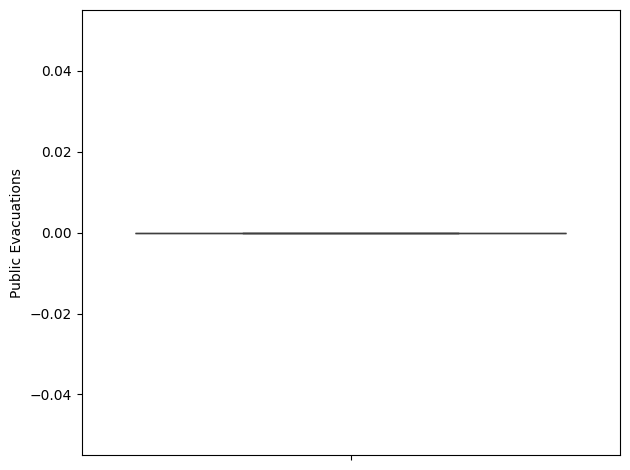

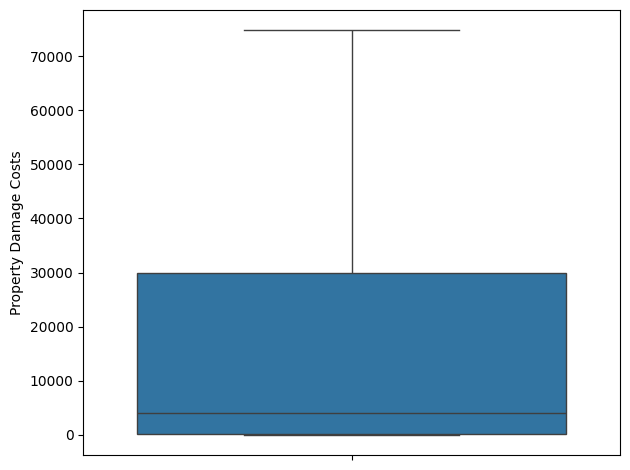

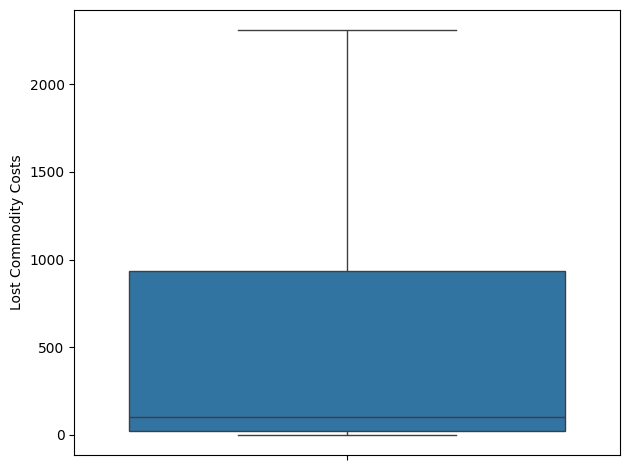

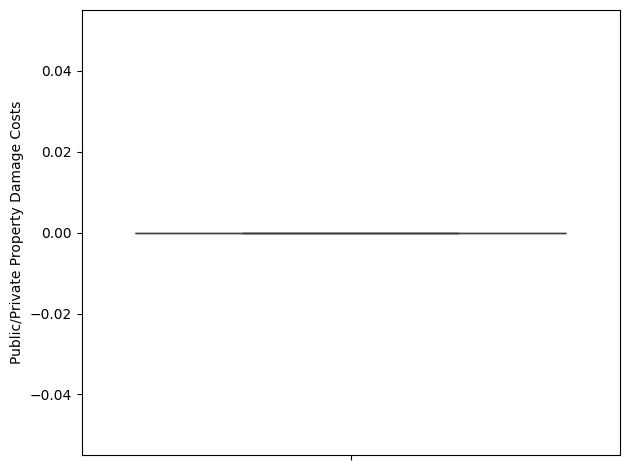

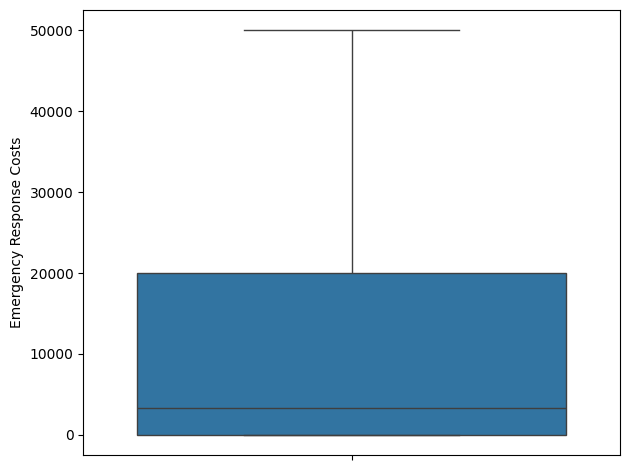

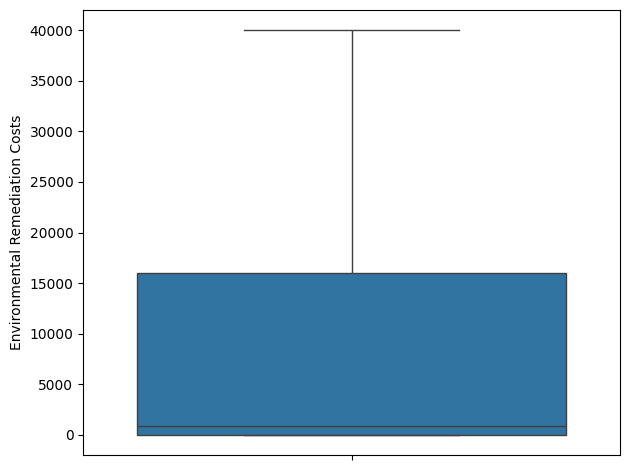

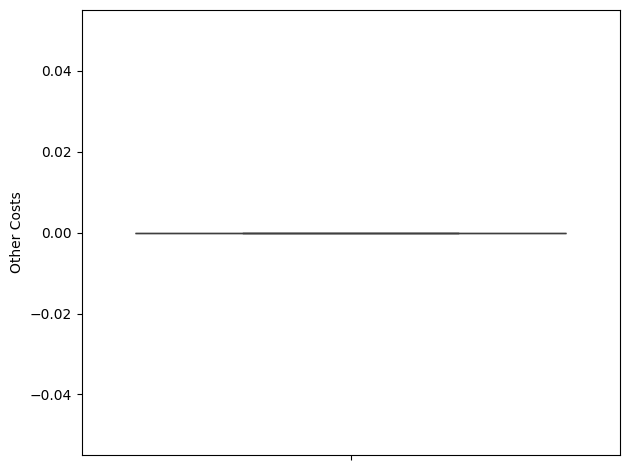

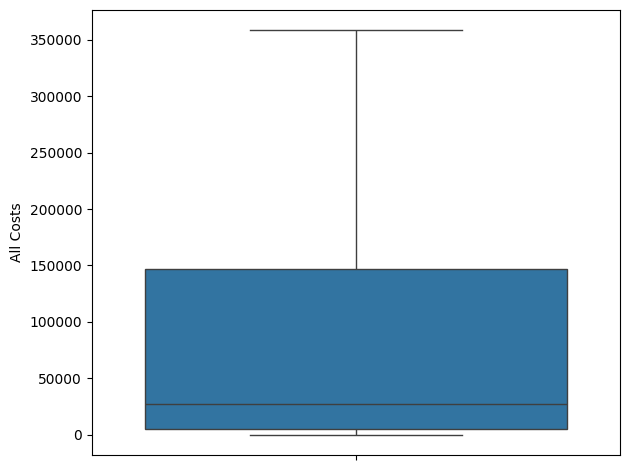

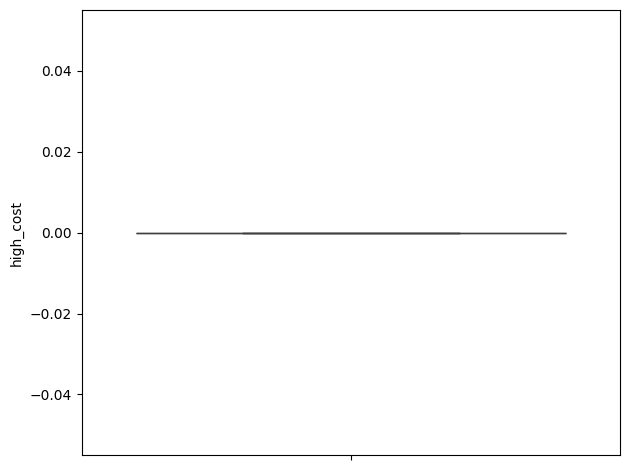

In [22]:
for i in numerics:
    sns.boxplot(df[i])
    plt.tight_layout()
    plt.show()

In [63]:
top_10=df['Accident County'].value_counts().head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26632\785734539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10,palette='Purples')


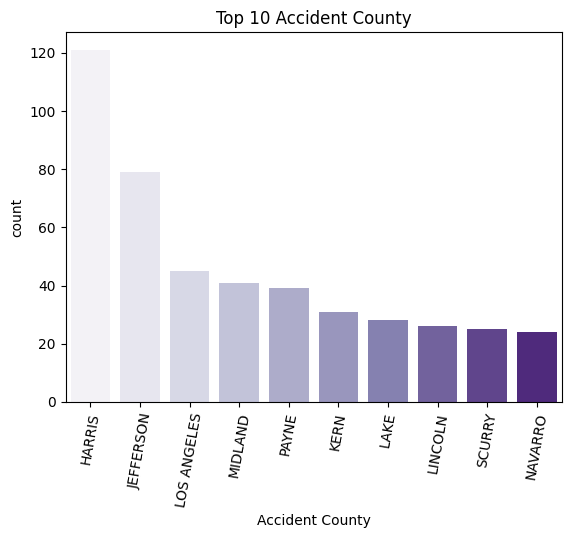

In [67]:
sns.barplot(top_10,palette='Purples')
plt.title('Top 10 Accident County')
plt.xticks(rotation=80)
plt.show()

In [70]:
df['Liquid Explosion'].value_counts()

Liquid Explosion
NO     1908
YES      15
Name: count, dtype: int64

<Axes: xlabel='Liquid Explosion', ylabel='count'>

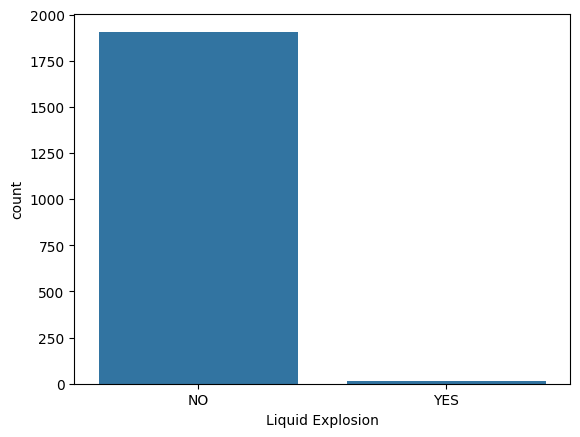

In [71]:
sns.barplot(df['Liquid Explosion'].value_counts())

## checking multicollinearity


In [31]:
for i in category:
    print(f'{i} = {df[i].nunique()}')

Operator Name = 199
Pipeline/Facility Name = 1473
Pipeline Location = 1
Pipeline Type = 4
Liquid Type = 5
Accident City = 862
Accident County = 539
Accident State = 43
Cause Category = 7
Cause Subcategory = 38
Liquid Ignition = 2
Liquid Explosion = 2
Pipeline Shutdown = 2


In [32]:
category=['Pipeline Type','Liquid Type','Cause Category','Liquid Ignition','Liquid Explosion','Pipeline Shutdown']

In [33]:
# onehot
onehot=OneHotEncoder(sparse_output=False)
categori=onehot.fit_transform(df[category],)
categori

# encoded
encoded=pd.DataFrame(categori,columns=onehot.get_feature_names_out())
encoded


,Pipeline Type_ABOVEGROUND,Pipeline Type_TANK,Pipeline Type_TRANSITION AREA,Pipeline Type_UNDERGROUND,Liquid Type_BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS),Liquid Type_CO2 (CARBON DIOXIDE),Liquid Type_CRUDE OIL,"Liquid Type_HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","Liquid Type_REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID",Cause Category_ALL OTHER CAUSES,...,Cause Category_INCORRECT OPERATION,Cause Category_MATERIAL/WELD/EQUIP FAILURE,Cause Category_NATURAL FORCE DAMAGE,Cause Category_OTHER OUTSIDE FORCE DAMAGE,Liquid Ignition_NO,Liquid Ignition_YES,Liquid Explosion_NO,Liquid Explosion_YES,Pipeline Shutdown_NO,Pipeline Shutdown_YES
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1919,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1920,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1921,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [27]:
num=df[numerics].reset_index(drop=True)
num

,Accident Year,Accident Latitude,Accident Longitude,Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,high_cost
0,2010.0,28.055290,-97.327970,3.00,0.00,0.0,30000.0,415.00,0.0,7971.0,40000.0,0.0,357269.0,0.0
1,2010.0,35.937490,-96.744170,21.00,0.00,0.0,6826.0,150.00,0.0,13357.0,0.0,0.0,20333.0,0.0
2,2010.0,36.398360,-96.746220,0.00,5.00,0.0,74797.5,2308.75,0.0,50000.0,40000.0,0.0,358292.5,0.0
3,2010.0,30.172400,-90.782000,0.00,3.49,0.0,0.0,254.00,0.0,0.0,0.0,0.0,254.0,0.0
4,2010.0,46.819700,-95.148900,0.00,0.48,0.0,0.0,34.00,0.0,0.0,40000.0,0.0,66679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2016.0,29.614125,-95.184793,3.00,0.00,0.0,65000.0,75.00,0.0,0.0,0.0,0.0,65075.0,0.0
1919,2016.0,39.517036,-93.486055,0.25,0.00,0.0,0.0,15.00,0.0,0.0,40000.0,0.0,61015.0,0.0
1920,2016.0,35.565292,-96.454956,1.00,0.00,0.0,7000.0,50.00,0.0,5000.0,3000.0,0.0,15050.0,0.0
1921,2017.0,40.631074,-80.440463,0.20,0.00,0.0,11852.0,11.00,0.0,29565.0,0.0,0.0,41428.0,0.0


In [34]:
# combined
# feeature selection
corr_matrix=num.corr()
corr_matrix

,Accident Year,Accident Latitude,Accident Longitude,Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,high_cost
Accident Year,1.000000,-0.124518,0.044319,-0.022862,-0.140635,NaN,-0.012402,-0.119710,NaN,-0.027073,-0.099742,NaN,-0.052662,NaN
Accident Latitude,-0.124518,1.000000,0.137029,0.043125,-0.078179,NaN,0.004820,-0.040614,NaN,0.110210,0.102808,NaN,0.057185,NaN
Accident Longitude,0.044319,0.137029,1.000000,-0.078050,-0.033536,NaN,0.061345,-0.050600,NaN,0.083307,0.048470,NaN,0.062219,NaN
Liquid Recovery (Barrels),-0.022862,0.043125,-0.078050,1.000000,0.219276,NaN,0.188844,0.573837,NaN,0.447469,0.518705,NaN,0.439592,NaN
Net Loss (Barrels),-0.140635,-0.078179,-0.033536,0.219276,1.000000,NaN,0.211338,0.541551,NaN,0.195248,0.274604,NaN,0.349373,NaN
Public Evacuations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Damage Costs,-0.012402,0.004820,0.061345,0.188844,0.211338,NaN,1.000000,0.328553,NaN,0.377472,0.272592,NaN,0.724084,NaN
Lost Commodity Costs,-0.119710,-0.040614,-0.050600,0.573837,0.541551,NaN,0.328553,1.000000,NaN,0.362239,0.461830,NaN,0.536160,NaN
Public/Private Property Damage Costs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emergency Response Costs,-0.027073,0.110210,0.083307,0.447469,0.195248,NaN,0.377472,0.362239,NaN,1.000000,0.463448,NaN,0.665127,NaN


In [ ]:
From above analysis most columns are NAN . Even after removing null values.

In [35]:
num.drop(['Other Costs','Other Costs','Public/Private Property Damage Costs','Public Evacuations'],axis=1,inplace=True)

In [37]:
num.drop('high_cost',axis=1,inplace=True)

In [38]:
# combined
# feeature selection
corr_matrix=num.corr()
corr_matrix

,Accident Year,Accident Latitude,Accident Longitude,Liquid Recovery (Barrels),Net Loss (Barrels),Property Damage Costs,Lost Commodity Costs,Emergency Response Costs,Environmental Remediation Costs,All Costs
Accident Year,1.000000,-0.124518,0.044319,-0.022862,-0.140635,-0.012402,-0.119710,-0.027073,-0.099742,-0.052662
Accident Latitude,-0.124518,1.000000,0.137029,0.043125,-0.078179,0.004820,-0.040614,0.110210,0.102808,0.057185
Accident Longitude,0.044319,0.137029,1.000000,-0.078050,-0.033536,0.061345,-0.050600,0.083307,0.048470,0.062219
Liquid Recovery (Barrels),-0.022862,0.043125,-0.078050,1.000000,0.219276,0.188844,0.573837,0.447469,0.518705,0.439592
Net Loss (Barrels),-0.140635,-0.078179,-0.033536,0.219276,1.000000,0.211338,0.541551,0.195248,0.274604,0.349373
Property Damage Costs,-0.012402,0.004820,0.061345,0.188844,0.211338,1.000000,0.328553,0.377472,0.272592,0.724084
Lost Commodity Costs,-0.119710,-0.040614,-0.050600,0.573837,0.541551,0.328553,1.000000,0.362239,0.461830,0.536160
Emergency Response Costs,-0.027073,0.110210,0.083307,0.447469,0.195248,0.377472,0.362239,1.000000,0.463448,0.665127
Environmental Remediation Costs,-0.099742,0.102808,0.048470,0.518705,0.274604,0.272592,0.461830,0.463448,1.000000,0.595170
All Costs,-0.052662,0.057185,0.062219,0.439592,0.349373,0.724084,0.536160,0.665127,0.595170,1.000000


In [ ]:
now the data is cleaned.

<Axes: >

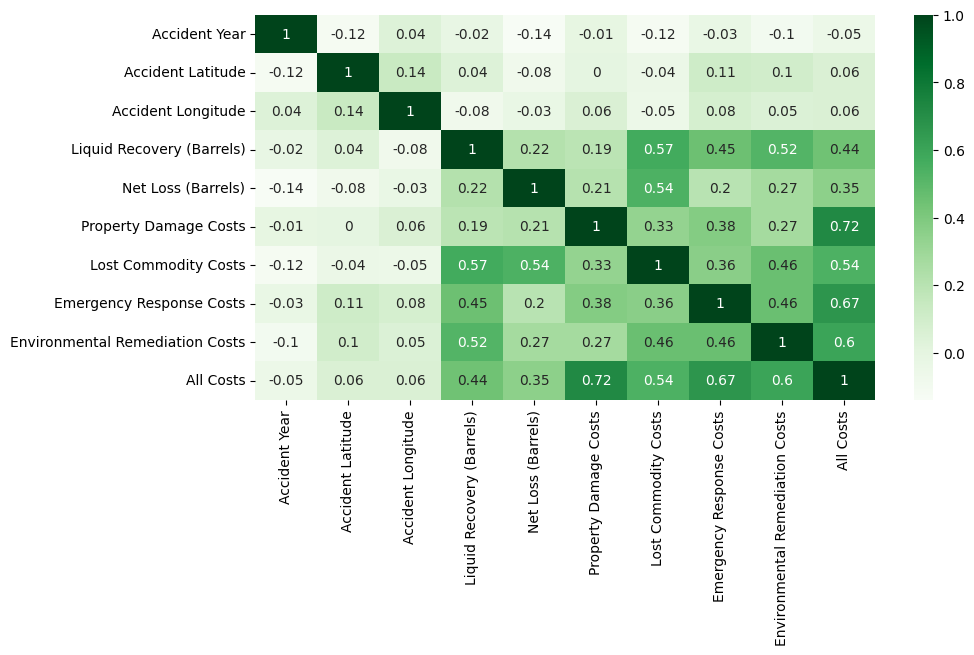

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(round(corr_matrix,2),annot=True,cmap='Greens')

In [ ]:
There is no multicollinearity in the numerics data. 

<Axes: >

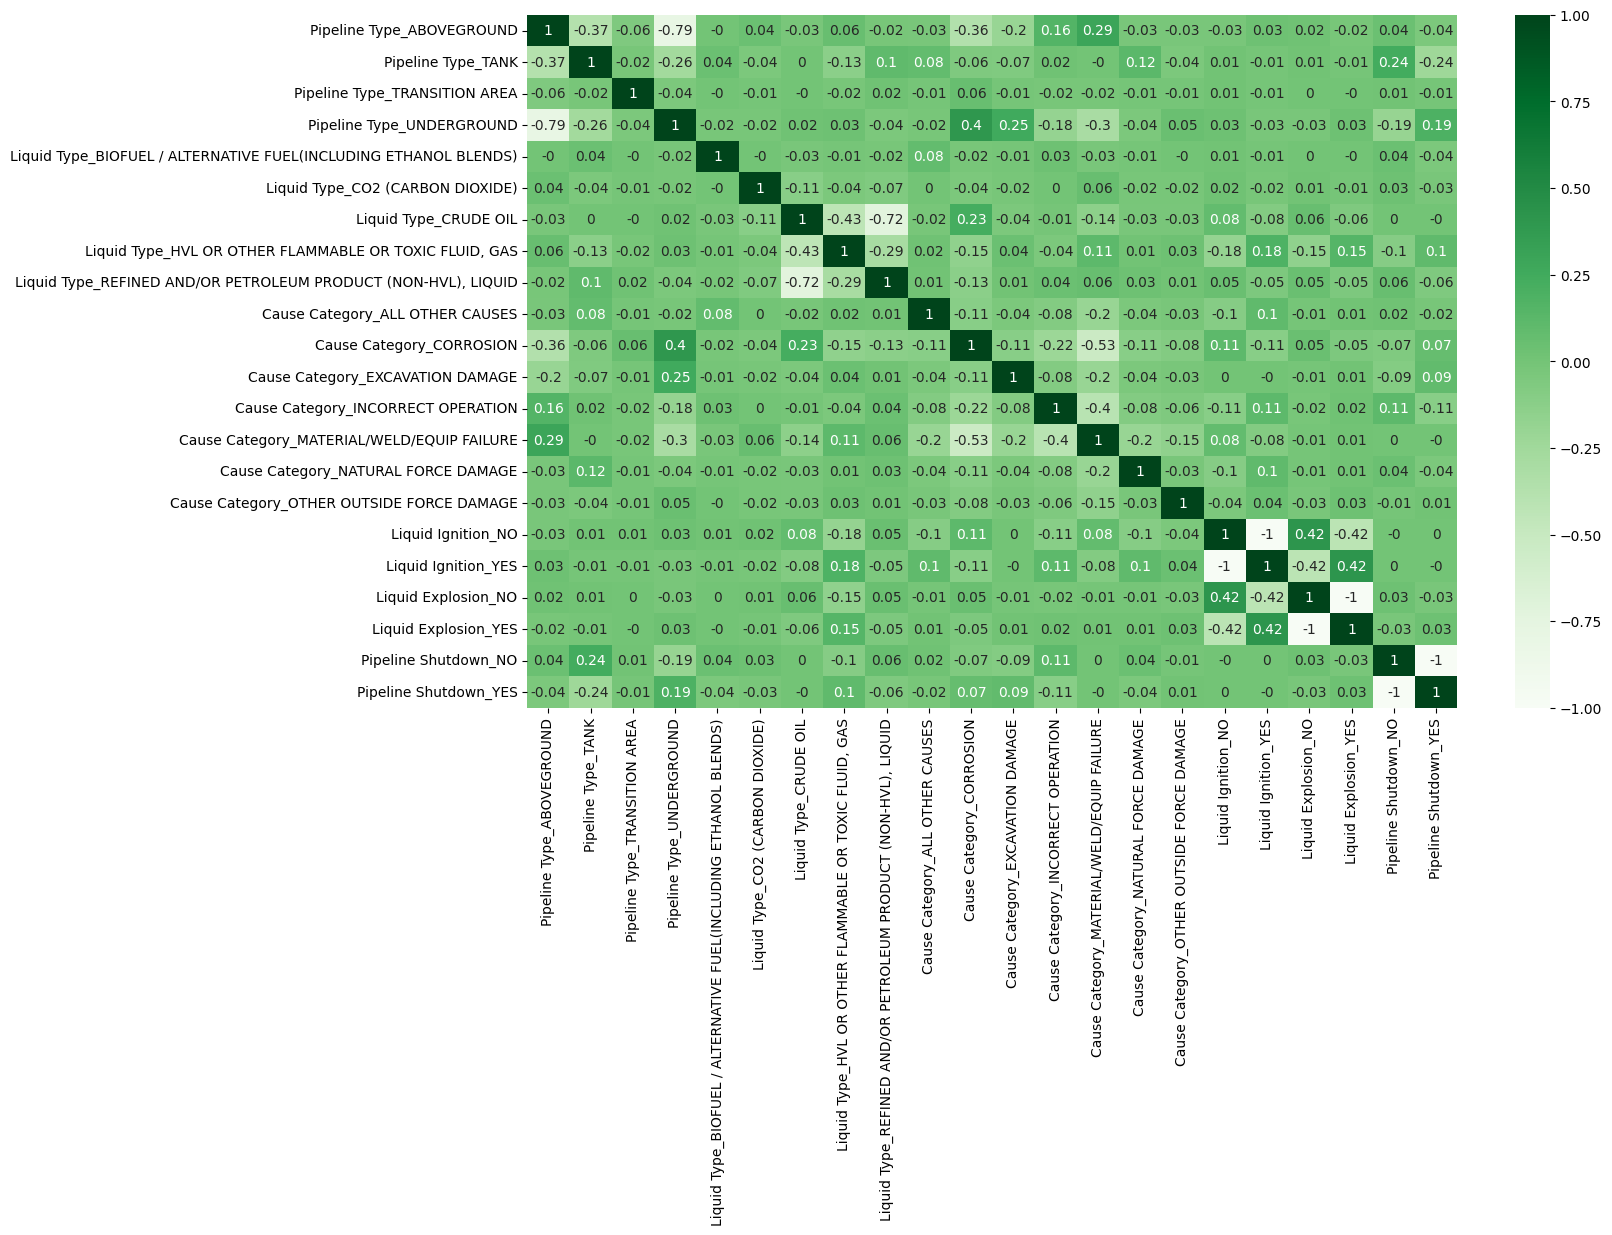

In [46]:
plt.figure(figsize=(15,9))
sns.heatmap(round(encoded.corr(),2),annot=True,cmap='Greens')

In [ ]:
There is no multicollinearity in category also.

In [47]:
num.columns

Index(['Accident Year', 'Accident Latitude', 'Accident Longitude',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs',
       'All Costs'],
      dtype='object')

In [48]:
category

['Pipeline Type',
 'Liquid Type',
 'Cause Category',
 'Liquid Ignition',
 'Liquid Explosion',
 'Pipeline Shutdown']

# Step 4 Model building

In [49]:
# Features
x=df[['Accident Year', 'Accident Latitude', 'Accident Longitude',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs','Pipeline Type',
 'Liquid Type',
 'Cause Category',
 'Liquid Ignition',
 'Liquid Explosion']]


# Target
y = df['All Costs']



In [89]:
df['All Costs']

11      357269.0
14       20333.0
16      358292.5
17         254.0
19       66679.0
          ...   
2787     65075.0
2790     61015.0
2792     15050.0
2793     41428.0
2794     45800.0
Name: All Costs, Length: 1923, dtype: float64

In [50]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [51]:
numer=x_train.select_dtypes(np.number).columns.tolist()
cat=x_train.select_dtypes('object').columns.tolist()


In [52]:
preproces=ColumnTransformer([('scale',StandardScaler(),numer),('categor',OneHotEncoder(),cat) ])

In [53]:
linear_pipe=Pipeline([('preprocess',preproces),('linearregression',LinearRegression())])

In [54]:
linear_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Accident Year',
                                                   'Accident Latitude',
                                                   'Accident Longitude',
                                                   'Liquid Recovery (Barrels)',
                                                   'Net Loss (Barrels)',
                                                   'Property Damage Costs',
                                                   'Lost Commodity Costs',
                                                   'Emergency Response Costs',
                                                   'Environmental Remediation '
                                                   'Costs']),
                                                 ('categor', OneHotEncoder(),
                                                  ['Pipeline Type',
                                                   'Liquid Type',
                                                   'Cause Category',
                                                   'Liquid Ignition',
                                                   'Liquid Explosion'])])),
                ('linearregression', LinearRegression())])

In [55]:
predicted=linear_pipe.predict(x_test)
# predicted

In [56]:
mean_squared_error(predicted,y_test)

3307388037.9041243

In [57]:
root_mean_squared_error(predicted,y_test)

57509.89513035234

In [58]:
r2_score(predicted,y_test)

0.7542340967687486

In [59]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [60]:
randomfore_pipe=Pipeline([('preprocess',preproces),('randomfore_regres',RandomForestRegressor())])

In [61]:
randomfore_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Accident Year',
                                                   'Accident Latitude',
                                                   'Accident Longitude',
                                                   'Liquid Recovery (Barrels)',
                                                   'Net Loss (Barrels)',
                                                   'Property Damage Costs',
                                                   'Lost Commodity Costs',
                                                   'Emergency Response Costs',
                                                   'Environmental Remediation '
                                                   'Costs']),
                                                 ('categor', OneHotEncoder(),
                                                  ['Pipeline Type',
                                                   'Liquid Type',
                                                   'Cause Category',
                                                   'Liquid Ignition',
                                                   'Liquid Explosion'])])),
                ('randomfore_regres', RandomForestRegressor())])

In [62]:
predicted=randomfore_pipe.predict(x_test)

In [63]:
r2_score(predicted,y_test)

0.8230186530136412

## Logistics regression

In [106]:
# Features
x=df[['Accident Year', 'Accident Latitude', 'Accident Longitude',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs','Pipeline Type',
 'Liquid Type',
 'Cause Category',
 'Liquid Ignition',
 'Liquid Explosion']]


# Target
y = df['Pipeline Shutdown']

In [107]:
logist_pipe=Pipeline([('preprocess',preproces),('logistic',LogisticRegression())])

In [108]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [109]:
logist_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Accident Year',
                                                   'Accident Latitude',
                                                   'Accident Longitude',
                                                   'Liquid Recovery (Barrels)',
                                                   'Net Loss (Barrels)',
                                                   'Property Damage Costs',
                                                   'Lost Commodity Costs',
                                                   'Emergency Response Costs',
                                                   'Environmental Remediation '
                                                   'Costs']),
                                                 ('categor', OneHotEncoder(),
                                                  ['Pipeline Type',
                                                   'Liquid Type',
                                                   'Cause Category',
                                                   'Liquid Ignition',
                                                   'Liquid Explosion'])])),
                ('logistic', LogisticRegression())])

In [68]:
predicted=logist_pipe.predict(x_test)

In [69]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

          NO       0.61      0.58      0.59       170
         YES       0.68      0.71      0.70       215

    accuracy                           0.65       385
   macro avg       0.65      0.64      0.64       385
weighted avg       0.65      0.65      0.65       385



In [70]:
confusion_matrix(y_test,predicted)

array([[ 98,  72],
       [ 62, 153]], dtype=int64)

## Support vector machine

In [71]:
SVC_pipe=Pipeline([('preprocess',preproces),('svc',SVC())])

In [72]:
SVC_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Accident Year',
                                                   'Accident Latitude',
                                                   'Accident Longitude',
                                                   'Liquid Recovery (Barrels)',
                                                   'Net Loss (Barrels)',
                                                   'Property Damage Costs',
                                                   'Lost Commodity Costs',
                                                   'Emergency Response Costs',
                                                   'Environmental Remediation '
                                                   'Costs']),
                                                 ('categor', OneHotEncoder(),
                                                  ['Pipeline Type',
                                                   'Liquid Type',
                                                   'Cause Category',
                                                   'Liquid Ignition',
                                                   'Liquid Explosion'])])),
                ('svc', SVC())])

In [73]:
predicted=SVC_pipe.predict(x_test)

In [74]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

          NO       0.61      0.60      0.61       170
         YES       0.69      0.70      0.69       215

    accuracy                           0.65       385
   macro avg       0.65      0.65      0.65       385
weighted avg       0.65      0.65      0.65       385



In [75]:
confusion_matrix(y_test,predicted)

array([[102,  68],
       [ 65, 150]], dtype=int64)

## knearest neighbors

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_pipe=Pipeline([('preprocess',preproces),('knn',KNeighborsClassifier())])

In [78]:
knn_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Accident Year',
                                                   'Accident Latitude',
                                                   'Accident Longitude',
                                                   'Liquid Recovery (Barrels)',
                                                   'Net Loss (Barrels)',
                                                   'Property Damage Costs',
                                                   'Lost Commodity Costs',
                                                   'Emergency Response Costs',
                                                   'Environmental Remediation '
                                                   'Costs']),
                                                 ('categor', OneHotEncoder(),
                                                  ['Pipeline Type',
                                                   'Liquid Type',
                                                   'Cause Category',
                                                   'Liquid Ignition',
                                                   'Liquid Explosion'])])),
                ('knn', KNeighborsClassifier())])

In [79]:
predicted=knn_pipe.predict(x_test)

In [80]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

          NO       0.58      0.57      0.57       170
         YES       0.66      0.67      0.67       215

    accuracy                           0.63       385
   macro avg       0.62      0.62      0.62       385
weighted avg       0.63      0.63      0.63       385



In [81]:
confusion_matrix(y_test,predicted)

array([[ 97,  73],
       [ 71, 144]], dtype=int64)

## Random Forest

In [82]:
rand_pipe=Pipeline([('preprocess',preproces),('randfore',RandomForestClassifier(random_state=6))])

In [83]:
rand_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Accident Year',
                                                   'Accident Latitude',
                                                   'Accident Longitude',
                                                   'Liquid Recovery (Barrels)',
                                                   'Net Loss (Barrels)',
                                                   'Property Damage Costs',
                                                   'Lost Commodity Costs',
                                                   'Emergency Response Costs',
                                                   'Environmental Remediation '
                                                   'Costs']),
                                                 ('categor', OneHotEncoder(),
                                                  ['Pipeline Type',
                                                   'Liquid Type',
                                                   'Cause Category',
                                                   'Liquid Ignition',
                                                   'Liquid Explosion'])])),
                ('randfore', RandomForestClassifier(random_state=6))])

In [84]:
predicted=rand_pipe.predict(x_test)

In [85]:
confusion_matrix(y_test,predicted)

array([[ 99,  71],
       [ 60, 155]], dtype=int64)

In [86]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

          NO       0.62      0.58      0.60       170
         YES       0.69      0.72      0.70       215

    accuracy                           0.66       385
   macro avg       0.65      0.65      0.65       385
weighted avg       0.66      0.66      0.66       385



## Kmeans clustering

In [93]:
from sklearn.cluster import KMeans

In [210]:
kmeans=KMeans()

### find k optimal clusters using elbow method

In [87]:
x=df[['Accident Year', 'Accident Latitude', 'Accident Longitude',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs','Pipeline Type',
 'Liquid Type',
 'Cause Category',
 'Liquid Ignition',
 'Liquid Explosion']]

In [88]:
numer=[
    'Accident Year', 'Accident Latitude', 'Accident Longitude',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Emergency Response Costs', 'Environmental Remediation Costs']
cate=[
    'Pipeline Type',
 'Liquid Type',
 'Cause Category',
 'Liquid Ignition',
 'Liquid Explosion']

In [89]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df[numer])

In [90]:
onehot=OneHotEncoder(sparse_output=False)
categorized=onehot.fit_transform(df[cate])

In [91]:
preprocessed=np.hstack([scaled,categorized])

In [94]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(preprocessed)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'elbow method')

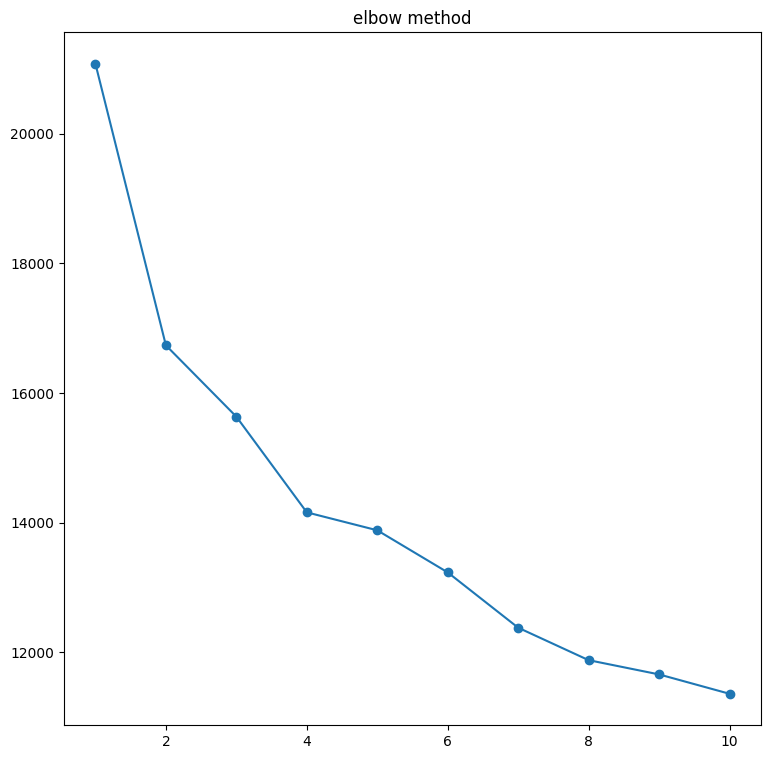

In [95]:
plt.figure(figsize=(9,9))
plt.plot(range(1,11),inertia,marker='o')
plt.title('elbow method')

In [99]:
k=3
kmeans=KMeans(n_clusters=k)
kmeans.fit(preprocessed)

KMeans(n_clusters=3)

In [100]:
labels=kmeans.labels_

In [101]:
silhouette_score(preprocessed,labels)

0.14357872398753047

## Step 5 conclusion

In this project, we worked on **oil pipeline accident** data to explore, clean, and model the dataset effectively. Below are the key steps and results:

**Data Preprocessing**

Removed null values and outliers

Dropped categorical columns with more than 10 unique values

Applied One-Hot Encoding and Standard Scaling

**EDA (Exploratory Data Analysis)**

Analyzed distributions and relationships between features

Removed multicollinearity by dropping features with correlation > 0.8

**Model Building and Evaluation**

Built pipelines for Linear Regression, Logistic Regression, SVM, KNN, and KMeans Clustering

Best model accuracy achieved: 66%

